<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import precision_score, f1_score, recall_score
%matplotlib inline

In [64]:
df = load_digits()


In [65]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [66]:
df.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

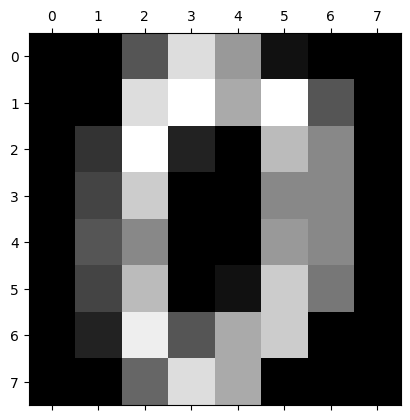

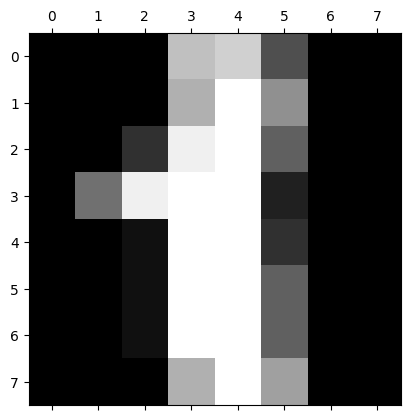

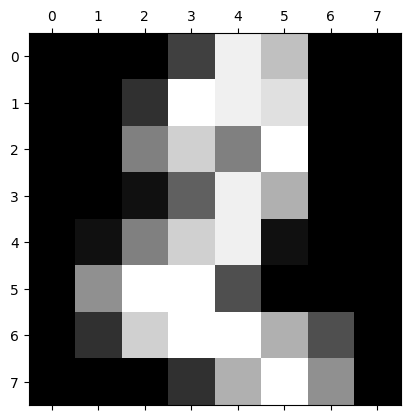

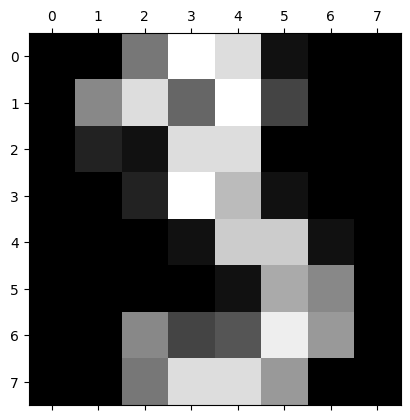

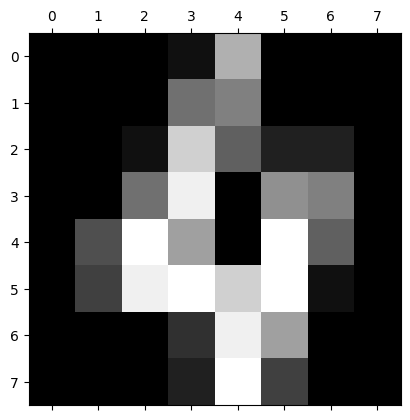

In [67]:
plt.gray()
for i in range(5):
    plt.matshow(df.images[i])

In [68]:
df.target , df.target_names

(array([0, 1, 2, ..., 8, 9, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target , test_size = 0.25 , random_state=42)

In [71]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
score = lr.score(X_test,y_test)
score

0.9733333333333334

In [88]:
from sklearn.metrics import confusion_matrix
pred0 = lr.predict(X_test)

In [90]:
cm = confusion_matrix(y_test,pred0)
print("the confusion matrix is : \n",cm)

the confusion matrix is : 
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 53  0  1  0  0  0]
 [ 0  0  0  0  0 57  1  0  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


Text(95.72222222222221, 0.5, 'Truth')

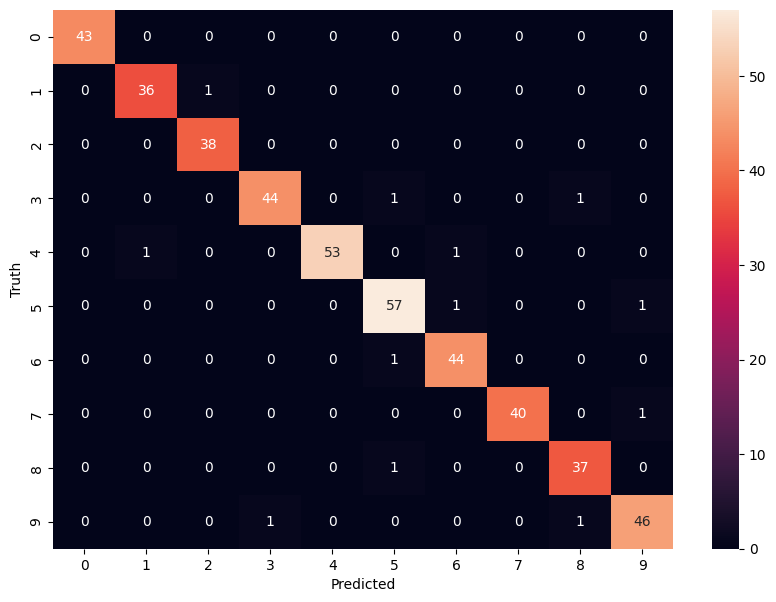

In [76]:

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


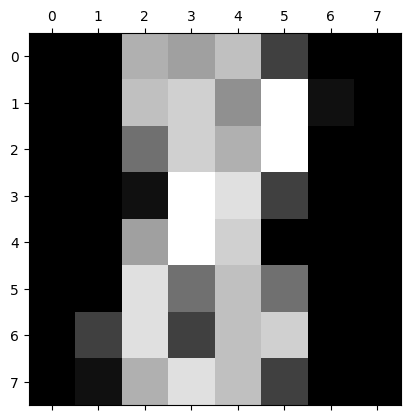

In [77]:
plt.matshow(df.images[40])

In [78]:
df.target[40]

8

In [79]:
lr.predict([df.data[40]])

array([8])

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
pred = dt.predict(X_test)
score1 = dt.score(X_test,y_test)
print(score)

0.9733333333333334


In [82]:
cm1 = confusion_matrix(y_test,dt.predict(X_test))
print("the confusion matrix is : \n",cm1)

the confusion matrix is : 
 [[39  0  0  0  3  1  0  0  0  0]
 [ 0 31  1  0  1  0  0  0  4  0]
 [ 0  0 31  3  1  0  0  1  2  0]
 [ 0  0  1 38  1  1  0  1  4  0]
 [ 0  1  0  0 50  1  1  1  0  1]
 [ 1  1  0  1  0 52  2  1  1  0]
 [ 0  0  0  0  0  1 42  0  0  2]
 [ 0  0  0  0  2  2  0 36  0  1]
 [ 0  5  2  2  1  0  1  0 26  1]
 [ 0  0  0  2  1  0  0  1  0 44]]


Text(95.72222222222221, 0.5, 'Truth')

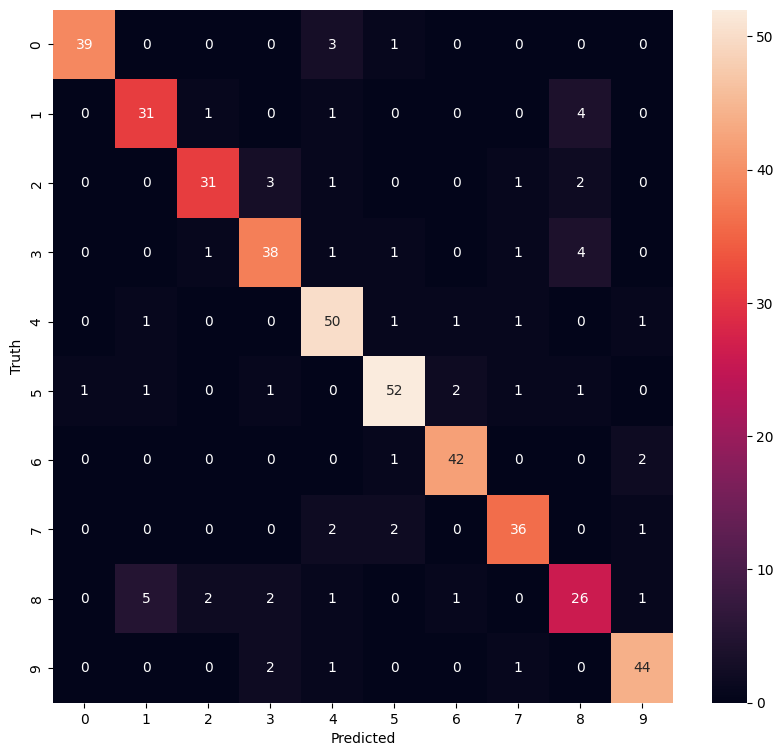

In [83]:

plt.figure(figsize=(10,9))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


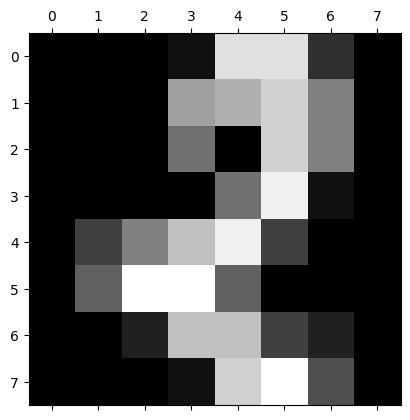

In [84]:
plt.matshow(df.images[54])

In [85]:
df.target[54]

2

In [86]:
dt.predict(df.data[[54]])

array([2])

In [87]:

# for decision tree
print(f'precision score \n : {precision_score(y_test,pred,average=None)}')
print(f'f1 score \n: {f1_score(y_test,pred,average=None)}')
print(f'recall score \n: {recall_score(y_test,pred,average=None)}')

precision score 
 : [0.975      0.81578947 0.88571429 0.82608696 0.83333333 0.89655172
 0.91304348 0.87804878 0.7027027  0.89795918]
f1 score 
: [0.93975904 0.82666667 0.84931507 0.82608696 0.86956522 0.88888889
 0.92307692 0.87804878 0.69333333 0.90721649]
recall score 
: [0.90697674 0.83783784 0.81578947 0.82608696 0.90909091 0.88135593
 0.93333333 0.87804878 0.68421053 0.91666667]


In [91]:
# for logistic regression

print(f'precision score \n : {precision_score(y_test,pred0,average=None)}')
print(f'f1 score \n: {f1_score(y_test,pred0,average=None)}')
print(f'recall score \n: {recall_score(y_test,pred0,average=None)}')

precision score 
 : [1.         0.97297297 0.97435897 0.97777778 1.         0.95
 0.95652174 1.         0.94871795 0.95833333]
f1 score 
: [1.         0.97297297 0.98701299 0.96703297 0.98148148 0.95798319
 0.96703297 0.98765432 0.96103896 0.95833333]
recall score 
: [1.         0.97297297 1.         0.95652174 0.96363636 0.96610169
 0.97777778 0.97560976 0.97368421 0.95833333]
